### important: 
**DO NOT** focus on the math details behind different models for now, otherwise you will get lost!

[reference](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks)

![confusion matrix](confusion-matrix.png)

### Sup learning Review
- obs -> compress into models, model -> predictions
- sup learning y = f(X), given obs, which are X and y pairs (1000 samples mean 1000 pairs of X (n, m), y(n, 1))
- we are looking for proper **f** so that f can be good both for the training samples and test samples
- **f** has structures, (linear regression, logistic regress, SVM, KNN, NN, RF ect)
- **f** has knobs(parameters), what is training. first we select the structure, second, the training is tuning the knobs (parameters) so that, errors becomes smaller and samller
- both for the training sets and test sets

### Overfitting
- what is overfitting. 
- why a model overfits? because there more knobs for the model than samples. 10 samples, a @ X + b, vc dimention
- what make a model struture good?
1. model should be flex enough (model should have enough knobs)
2. model shouldn't have too many knobs. you can have many knobs, you are restricting the movements of the knobs. model should be rigid, restricted in movements. 
3. regularization


### comparing different sup learning models (please put the math aside, only focusing the framework of suplearning)

### data sets

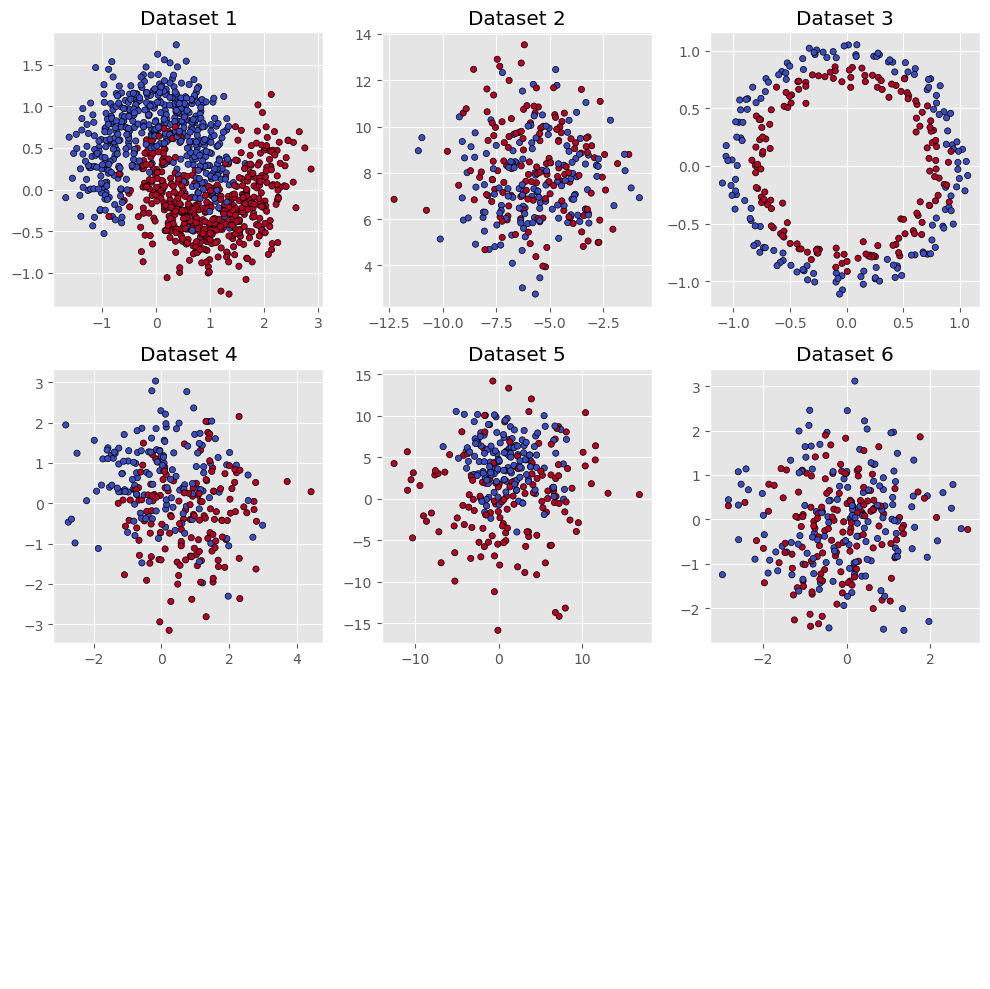

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs, make_moons, make_blobs, make_circles

# Generate datasets
datasets = [
    make_moons(n_samples=1000, noise=0.3, random_state=42),  # Moons Data
    make_blobs(n_samples=300, n_features=2, centers=2, random_state=5, cluster_std=1.95), # Blobs Data
    make_circles(n_samples=300, noise=0.05, random_state=42), # Circles Data
    make_moons(n_samples=300, noise=0.9, random_state=0), # Interleaved Moons
    make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=[3.0, 5.5], random_state=0), # Varied Blobs
    make_circles(n_samples=300, noise=0.9, factor=0.5, random_state=0), # Concentric Circles
]

# Plot each dataset
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # Adjust subplot grid as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

for i, dataset in enumerate(datasets):
    X, y = dataset    
    axs[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')
    axs[i].set_title(f"Dataset {i+1}")

# Hide any unused subplots
for ax in axs[len(datasets):]:
    ax.axis('off')

plt.tight_layout()
plt.show()




### Models


In [ ]:
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create a dictionary of the models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

datasets = {
    # "Moons Data": make_moons(n_samples=1000, noise=0.3, random_state=42),
    # "Blobs Data": make_blobs(n_samples=1000, n_features=2, centers=2, random_state=5, cluster_std=1.95),
    # "Circles Data": make_circles(n_samples=1000, noise=0.05, random_state=42),
    "Interleaved Moons": make_moons(n_samples=10000, noise=0.9, random_state=0),
    "Varied Blobs": make_blobs(n_samples=10000, n_features=2, centers=2, cluster_std=[3.0, 5.5], random_state=0),
    "Concentric Circles": make_circles(n_samples=10000, noise=0.9, factor=0.5, random_state=0),
    "High Dimensional Blobs": make_blobs(n_samples=10000, n_features=100, centers=2, random_state=5, cluster_std=3.95),
}


# Function to fit and evaluate models
def fit_and_evaluate(models, datasets):
    for data_name, (X, y) in datasets.items():
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"\n{data_name} Results:\n")
        for name, model in models.items():
            # Fit the model
            model.fit(X_train, y_train)
            # Make predictions
            predictions = model.predict(X_test)
            # Print classification report
            print(f"{name} Classification Report:")
            print(classification_report(y_test, predictions))
            print("---------------------------------------------")

fit_and_evaluate(models, datasets)


### Insight: models are just different structures with different knobs. But the framework is general

### SVM

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

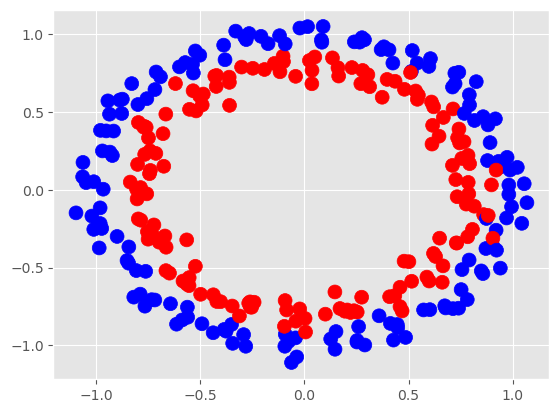

In [16]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_circles(n_samples=300, noise=0.05, random_state=42)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=5, cluster_std=0.95)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()



In [17]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0])

In [19]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.94      1.00      0.97        33
         red       1.00      0.95      0.98        42

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75



### DT

In [20]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [29]:
# Loading data
file_path = Path("Resources/credit_data.csv")
df = pd.read_csv(file_path)
df
df['credit_risk'].value_counts()

credit_risk
good    700
bad     300
Name: count, dtype: int64

In [ ]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

# Set Index
X = X.set_index('id')
display(X.columns)
X

#### Fitting the Decision Tree Model


In [26]:
# below code is only for demo, some columns shouldn't be one hot encoded
X = pd.get_dummies(X)

X.head()
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()
# Fitting the model
model = model.fit(X_train_scaled, y_train)

#### Making Predictions Using the Tree Model

In [27]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

#### Model Evaluation

In [28]:
# Displaying classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.49      0.53      0.51        74
        good       0.80      0.77      0.78       176

    accuracy                           0.70       250
   macro avg       0.64      0.65      0.65       250
weighted avg       0.71      0.70      0.70       250



### RF
- RF is an ensemble of shallow DT (regulerization, restrictions) 
- an ensemble of weak learners is better than one strong learner. 

In [ ]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Loading and Preprocessing Loans Encoded Data

In [ ]:
# Loading data
file_path = Path("Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

#### Fitting the Random Forest Model

#### Model Evaluation

#### Feature Importance

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [ ]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

### KNN

In [ ]:
# Import Modules
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler